In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime as dt

## Read Data

In [2]:
df = pd.read_csv("../Data/train.csv")
df["sample_id"] = df.index
df = df[['is_listened', 'sample_id', 'genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family', 'media_duration',
       'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age']]
df.head()

,is_listened,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age
0,0,0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29
1,1,1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30
2,1,2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29
3,0,3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30
4,1,4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24


#### Dimension of dataset

In [3]:
df.shape

(7558834, 16)

#### Column names

In [4]:
df.columns

Index(['is_listened', 'sample_id', 'genre_id', 'ts_listen', 'media_id',
       'album_id', 'context_type', 'release_date', 'platform_name',
       'platform_family', 'media_duration', 'listen_type', 'user_gender',
       'user_id', 'artist_id', 'user_age'],
      dtype='object')

#### NaN

In [5]:
df.isna().sum()

is_listened        0
sample_id          0
genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
dtype: int64

#### Data types

In [6]:
df.dtypes

is_listened        int64
sample_id          int64
genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
dtype: object

#### Create subsample

#### Unique values per column

In [7]:
df.nunique()

is_listened              2
sample_id          7558834
genre_id              2922
ts_listen          2256230
media_id            452975
album_id            151471
context_type            74
release_date          8902
platform_name            3
platform_family          3
media_duration        1652
listen_type              2
user_gender              2
user_id              19918
artist_id            67142
user_age                13
dtype: int64

#### Descriptive statistics

In [8]:
df.describe()

,is_listened,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age
count,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06
mean,6.840330e-01,3.779416e+06,2.245030e+03,1.479011e+09,7.839624e+07,8.136169e+06,2.360018e+00,2.011388e+07,4.731900e-01,2.558086e-01,2.311527e+02,3.068742e-01,3.936884e-01,4.037300e+03,1.500740e+06,2.431278e+01
std,4.648999e-01,2.182048e+06,1.308979e+04,1.189935e+07,5.133633e+07,5.460090e+06,4.659856e+00,7.570138e+04,7.353008e-01,5.481663e-01,7.999463e+01,4.611968e-01,4.885672e-01,3.954754e+03,2.519546e+06,3.767797e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000580e+05,1.976000e+03,0.000000e+00,1.900010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
25%,0.000000e+00,1.889708e+06,0.000000e+00,1.478460e+09,1.376614e+07,1.255566e+06,0.000000e+00,2.009123e+07,0.000000e+00,0.000000e+00,1.960000e+02,0.000000e+00,0.000000e+00,8.990000e+02,2.605000e+03,2.100000e+01
50%,1.000000e+00,3.779416e+06,3.000000e+00,1.479057e+09,9.380660e+07,9.525626e+06,1.000000e+00,2.014103e+07,0.000000e+00,0.000000e+00,2.220000e+02,0.000000e+00,0.000000e+00,2.738000e+03,1.941720e+05,2.500000e+01
75%,1.000000e+00,5.669125e+06,2.700000e+01,1.479742e+09,1.262592e+08,1.329221e+07,2.000000e+00,2.016061e+07,1.000000e+00,0.000000e+00,2.540000e+02,1.000000e+00,1.000000e+00,6.064000e+03,1.519461e+06,2.800000e+01
max,1.000000e+00,7.558833e+06,2.597310e+05,1.480636e+09,1.372601e+08,1.472086e+07,7.300000e+01,3.000010e+07,2.000000e+00,2.000000e+00,6.553500e+04,1.000000e+00,1.000000e+00,1.991700e+04,1.144741e+07,3.000000e+01


## Check for multicollinearity
#### Variance inflation factor
NOTE: VIF values above 10 indicates the presence of high multicolinearity. Usual approach would be to drop those variables. For values between 5-10 you should consider it as well.

In [10]:
X = df.drop(["is_listened"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF,features
0,1.00,sample_id
1,1.02,genre_id
2,0.88,ts_listen
3,494.14,media_id
4,496.20,album_id
5,1.13,context_type
6,0.20,release_date
7,1.45,platform_name
8,1.36,platform_family
9,1.02,media_duration


In the following example, "album_id" dropped, which drastically reduced VIF of media_id. "media_id" is one of the features which might be senseful to keep in the dataset.

In [11]:
X = df.drop(["is_listened", "album_id"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF,features
0,1.00,sample_id
1,1.01,genre_id
2,0.88,ts_listen
3,1.37,media_id
4,1.13,context_type
5,0.19,release_date
6,1.45,platform_name
7,1.36,platform_family
8,1.02,media_duration
9,1.08,listen_type


## Heatmap: Show correlations between features

<AxesSubplot:>

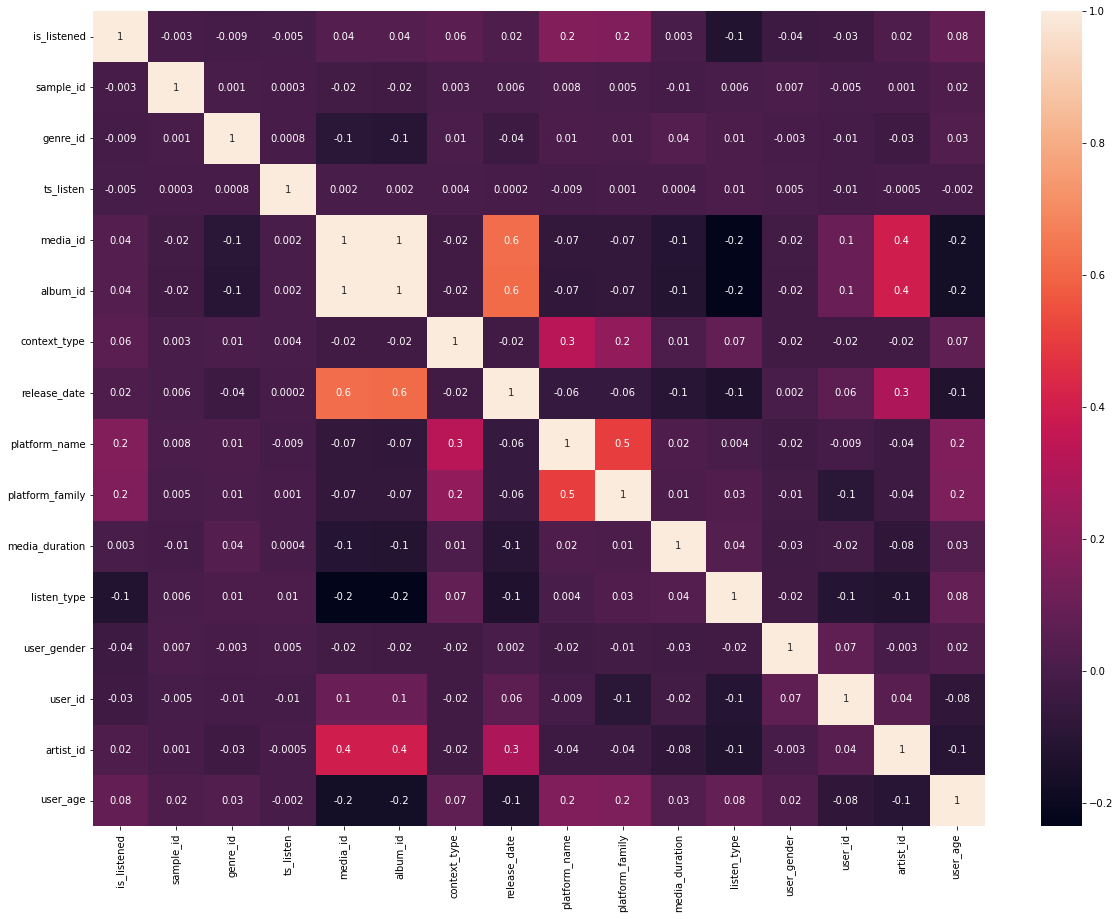

In [12]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(), annot=True, fmt=".1g")

## Create new features out of timestamps
#### for columns "ts_listen"

In [13]:
df["listen_dateTime"] = [dt.fromtimestamp(x) for x in df["ts_listen"]]
df["listen_month"] = df["listen_dateTime"].dt.month
df["listen_week"] = df["listen_dateTime"].dt.isocalendar().week.astype("int64")
df["listen_weekday"] = df["listen_dateTime"].dt.weekday
df["listen_hour"] = df["listen_dateTime"].dt.hour

#### for column "release_date"

In [14]:
df["release_dateTime"] = [dt.fromtimestamp(x) for x in df["release_date"]]
df["release_month"] = df["release_dateTime"].dt.month
df["release_week"] = df["release_dateTime"].dt.isocalendar().week.astype("int64")
df["release_weekday"] = df["release_dateTime"].dt.weekday
df["release_hour"] = df["release_dateTime"].dt.hour
df.head()

,is_listened,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,...,listen_dateTime,listen_month,listen_week,listen_weekday,listen_hour,release_dateTime,release_month,release_week,release_weekday,release_hour
0,0,0,25471,1480597215,222606,41774,12,20040704,1,0,...,2016-12-01 14:00:15,12,48,3,14,1970-08-21 00:51:44,8,34,4,0
1,1,1,25571,1480544735,250467,43941,0,20060301,2,1,...,2016-11-30 23:25:35,11,48,2,23,1970-08-21 06:18:21,8,34,4,6
2,1,2,16,1479563953,305197,48078,1,20140714,2,1,...,2016-11-19 14:59:13,11,46,5,14,1970-08-22 04:38:34,8,34,5,4
3,0,3,7,1480152098,900502,71521,0,20001030,0,0,...,2016-11-26 10:21:38,11,47,5,10,1970-08-20 13:50:30,8,34,3,13
4,1,4,7,1478368974,542335,71718,0,20080215,0,0,...,2016-11-05 19:02:54,11,44,5,19,1970-08-21 11:50:15,8,34,4,11


#### visualize in heatmap

<AxesSubplot:>

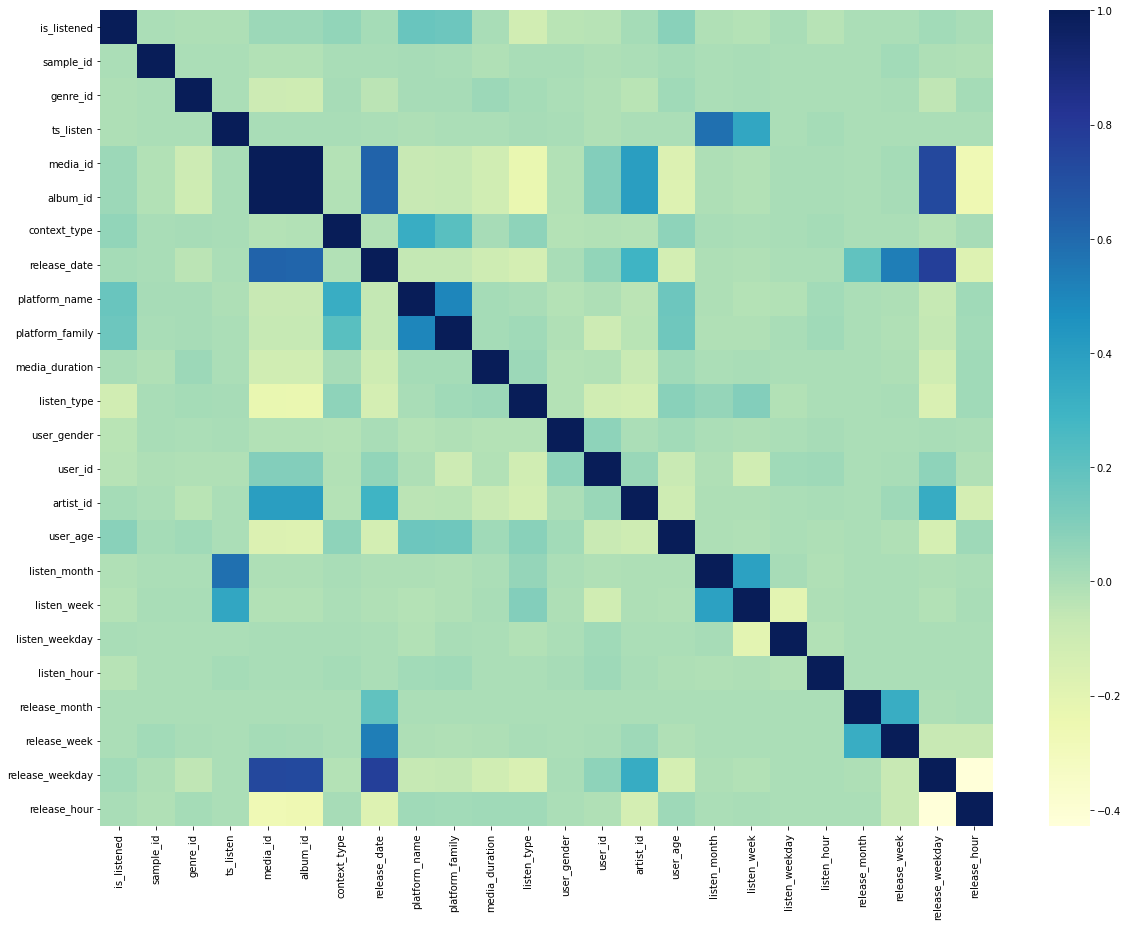

In [15]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(), annot=False, cmap="YlGnBu", fmt=".1g")

## Check for user age related ...

C:\Users\duong\Anaconda3\envs\duong\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_age', ylabel='count'>

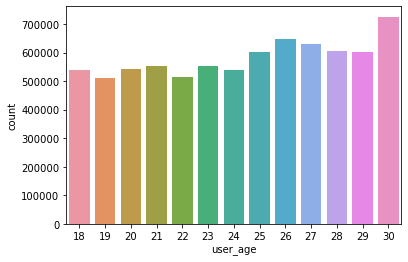

In [16]:
sns.countplot("user_age", data=df)

In [17]:
age_bins = [10, 15, 20, 25, 30, 35]
df["user_age_bin"] = pd.cut(df["user_age"], age_bins)
df.head()

,is_listened,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,...,listen_month,listen_week,listen_weekday,listen_hour,release_dateTime,release_month,release_week,release_weekday,release_hour,user_age_bin
0,0,0,25471,1480597215,222606,41774,12,20040704,1,0,...,12,48,3,14,1970-08-21 00:51:44,8,34,4,0,"(25, 30]"
1,1,1,25571,1480544735,250467,43941,0,20060301,2,1,...,11,48,2,23,1970-08-21 06:18:21,8,34,4,6,"(25, 30]"
2,1,2,16,1479563953,305197,48078,1,20140714,2,1,...,11,46,5,14,1970-08-22 04:38:34,8,34,5,4,"(25, 30]"
3,0,3,7,1480152098,900502,71521,0,20001030,0,0,...,11,47,5,10,1970-08-20 13:50:30,8,34,3,13,"(25, 30]"
4,1,4,7,1478368974,542335,71718,0,20080215,0,0,...,11,44,5,19,1970-08-21 11:50:15,8,34,4,11,"(20, 25]"


C:\Users\duong\Anaconda3\envs\duong\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_age_bin', ylabel='count'>

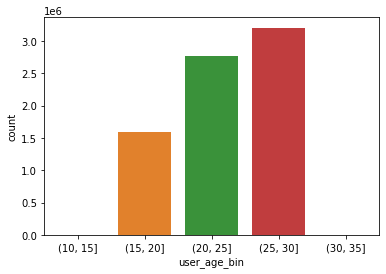

In [18]:
sns.countplot("user_age_bin", data=df)

## Create dataset: Take the features of potential interest

In [19]:
X = df.drop(["album_id", "is_listened", "user_age_bin", "listen_dateTime", "release_dateTime",
             "release_weekday", "release_week", "release_hour"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF,features
0,1.00,sample_id
1,1.01,genre_id
2,1.55,ts_listen
3,1.92,media_id
4,1.13,context_type
5,1.76,release_date
6,1.45,platform_name
7,1.37,platform_family
8,1.02,media_duration
9,1.09,listen_type


In [20]:
df = df.drop(["album_id", "user_age_bin", "listen_dateTime", "release_dateTime",
              "release_weekday", "release_week", "release_hour"], axis=1)

In [ ]:
df.head()

## Save preprocessed data

In [ ]:
df.to_csv("../Data/df_train_preprocessed.csv", index=False)

# Just playing around 
# Not really good so far to gain further knowledge... But might be adapted to whatever might be interesting...

## Data Visualization

In [ ]:
x = df["user_id"]
y = df["media_id"]
z = df["genre_id"]
# z = df["is_listened"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("genre_id")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])
# ax.grid(False)

# scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["is_listened"])
# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks([0,1])
# cb.set_ticklabels(["not listened", "listened"])


# "user_id", "media_id", hue="is_listened"

plt.show()

In [ ]:
x = df["user_id"]
y = df["media_id"]
# z = df["genre_id"]
z = df["is_listened"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("is_listened")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
ax.set_zticks([0,1])
# ax.grid(False)

scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["genre_id"])
cb = plt.colorbar(scat_plot, pad=0.2)
cb.set_ticks([0,1])
cb.set_ticklabels(["genre"])


# "user_id", "media_id", hue="is_listened"

plt.show()

In [ ]:
sns.scatterplot("user_id", "media_id", hue="is_listened", data=df)

In [ ]:
sns.barplot("user_id", "media_id", hue="is_listened", data=df)

In [ ]:
sns.heatmap(df)

In [ ]:
mosaic(df, ["is_listened", "genre_id"])